In [6]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [7]:
# Job Demand in India
df_india = df[df['job_country'] == 'India'].copy()

df_india

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,"['powershell', 'python', 'sql', 'mysql', 'sql ...","{'cloud': ['databricks', 'azure'], 'databases'..."
19,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,None,NaN,NaN,Bitwise Solutions,"['r', 'sql', 'python', 'scala', 'java', 'c++',...","{'analyst_tools': ['tableau'], 'libraries': ['..."
29,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Exusia,Full-time,False,India,2023-03-26 13:16:20,False,False,India,None,NaN,NaN,Exusia,None,None
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc","['sql', 'python', 'databricks', 'power bi', 'e...","{'analyst_tools': ['power bi', 'excel', 'word'..."
42,Senior Data Engineer,"Senior Data Engineer(Python)-1563,1637&1633","Chennai, Tamil Nadu, India",via HR Software For Growing Businesses | Fresh...,Full-time,False,India,2023-11-10 13:30:41,True,False,India,None,NaN,NaN,CESIT,"['python', 'sql', 'aws', 'pyspark', 'docker', ...","{'async': ['jira'], 'cloud': ['aws'], 'librari..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785712,Data Engineer,India - Collections Analyst II,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Varite India Private Limited,"['excel', 'flow']","{'analyst_tools': ['excel'], 'other': ['flow']}"
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None
785716,Software Engineer,Application Support Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,CompuGroup Medical,"['c#', 'sql']","{'programming': ['c#', 'sql']}"
785718,Business Analyst,Senior Performance QA Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Diebold Nixdorf,None,None


In [10]:
# Create a new column for job_posted_month
df_india['job_posted_month'] = df_india['job_posted_date'].dt.strftime('%b')

In [22]:
# Creating a Pivot Table
df_india_pivot = df_india.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

In [35]:
# Reset the index
df_india_pivot.reset_index(inplace=True)
df_india_pivot['month_no'] = pd.to_datetime(df_india_pivot['job_posted_month'], format='%b').dt.month
df_india_pivot['month_no']


0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
Name: month_no, dtype: int32

In [36]:
# Sorting
df_india_pivot.sort_values(by='month_no', inplace=True)
df_india_pivot.set_index('job_posted_month', inplace=True)
df_india_pivot.drop(columns='month_no', inplace=True)

In [37]:
df_india_pivot

job_title_short,level_0,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,,
Jan,4,175,31,628,2132,1444,70,127,448,269,192
Feb,3,143,35,433,1631,932,42,94,313,165,157
Mar,7,116,37,422,1591,1005,34,96,351,194,180
Apr,0,170,32,418,1566,946,54,86,375,194,169
May,8,103,14,278,1384,837,31,59,329,134,98
Jun,6,146,26,367,1632,1129,41,66,427,238,125
Jul,5,142,25,457,1528,1123,54,75,359,204,155
Aug,1,189,25,618,1407,1157,47,126,343,235,148
Sep,11,155,34,630,1508,984,67,85,324,195,132


In [40]:
# Dropping level_0
df_india_pivot.drop(columns='level_0', inplace=True)
df_india_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
Jan,175,31,628,2132,1444,70,127,448,269,192
Feb,143,35,433,1631,932,42,94,313,165,157
Mar,116,37,422,1591,1005,34,96,351,194,180
Apr,170,32,418,1566,946,54,86,375,194,169
May,103,14,278,1384,837,31,59,329,134,98
Jun,146,26,367,1632,1129,41,66,427,238,125
Jul,142,25,457,1528,1123,54,75,359,204,155
Aug,189,25,618,1407,1157,47,126,343,235,148
Sep,155,34,630,1508,984,67,85,324,195,132


In [42]:
# Top 3 jobs in India
top_3 = df_india['job_title_short'].value_counts().head(3)
top_3 = top_3.index.to_list()

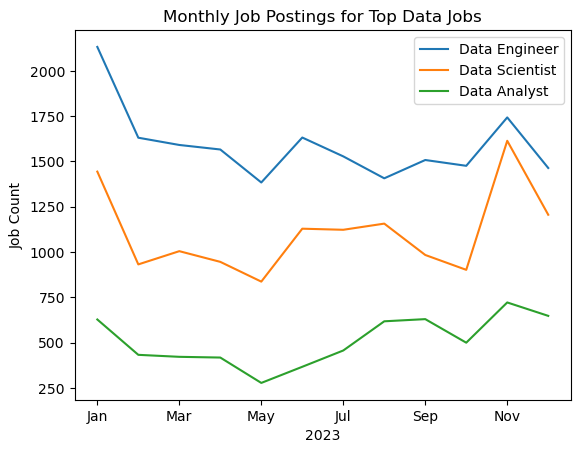

In [44]:
# Plotting
df_india_pivot[top_3].plot(kind='line')
plt.title('Monthly Job Postings for Top Data Jobs')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()